Covid19 Data Analysis
------------------------------------------
Motivation: Covid-19 is a contagious disease leading to an ongoing global pendanmic. I would like to analyze how susceptible developed and developing countries are to COVID-19.  

Hypothesis: Developed countries with better social support and life length expectancy have lower COVID-19 infection rates than developing countries. 

Conclusion: Developed countries do not have a lower COVID-19 infection rate than developing countries. Instead, developed countries usually have a higher infection rate than developing countries.  

### Step 0:  Import Useful Modules

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

## Step 1 Load and Clean the Data 

### Step 1.1: Load the Covid-19 dataset from JHU

In [2]:
corona_dataset_csv=pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


#### Examine the shape of the dataframe

In [3]:
corona_dataset_csv.shape

(266, 104)

### Step 1.2: Data Cleanse

In [4]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [41]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### Step 1.3: Aggregating the rows by the country

In [6]:
corona_dataset_aggregated= corona_dataset_csv.groupby("Country/Region").sum()

In [7]:
corona_dataset_aggregated.head( )

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
corona_dataset_aggregated.shape

(187, 100)

## Step 2: Data Visualization

### Step 2.1: Visualizing data related to a country for example China, Italy and Japan
visualization always helps for better understanding of our data.

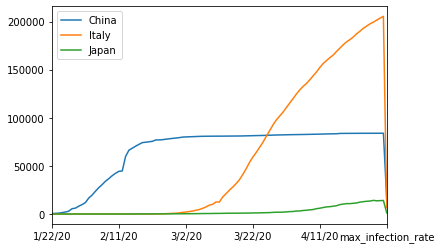

In [46]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Japan"].plot()
plt.legend()

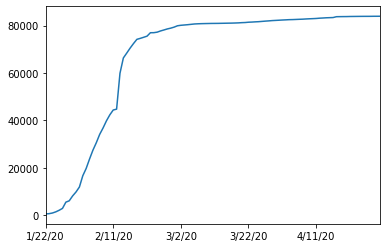

In [10]:
corona_dataset_aggregated.loc['China'].plot()

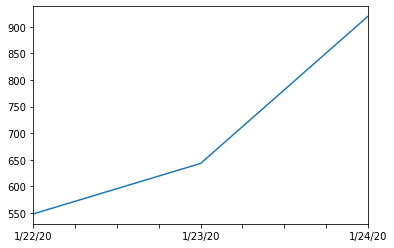

In [11]:
corona_dataset_aggregated.loc['China'][:3].plot()

### Step 2.2: caculating the first derivative of the curve

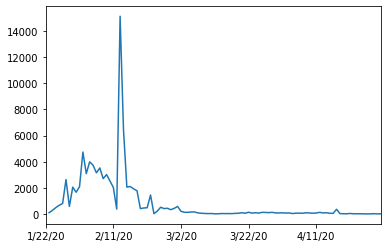

In [12]:
corona_dataset_aggregated.loc["China"].diff().plot()

### Step 2.3: find maxmimum infection rate for China

In [13]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [14]:
corona_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [15]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

### Step 2.4: find maximum infection rate for all of the countries. 

In [16]:
countries=list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"]=max_infection_rates

In [17]:
corona_dataset_aggregated.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,6.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,3144,3435,3607,3780,3892,4003,4127,4285,4428,291.0
Armenia,0,0,0,0,0,0,0,0,0,0,...,1473,1523,1596,1677,1746,1808,1867,1932,2066,134.0
Australia,0,0,0,0,4,5,5,6,9,9,...,6652,6662,6677,6694,6714,6721,6744,6752,6766,497.0


### Step 2.5: create a new dataframe with only needed column 

In [18]:
corona_data=pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [19]:
corona_data.head(10)

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
Antigua and Barbuda,6.0
Argentina,291.0
Armenia,134.0
Australia,497.0


### Step 3: Adding in the World Happiness Report Data
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Step 3.1 : importing the dataset

In [20]:
happiness_report_csv= pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [21]:
happiness_report_csv.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


### Step 3.2: Drop the useless columns

In [22]:
useless_cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [23]:
happiness_report_csv.drop(useless_cols,axis=1,inplace=True)
happiness_report_csv.head(10)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
5,Switzerland,1.452,1.526,1.052,0.572
6,Sweden,1.387,1.487,1.009,0.574
7,New Zealand,1.303,1.557,1.026,0.585
8,Canada,1.365,1.505,1.039,0.584
9,Austria,1.376,1.475,1.016,0.532


### Step 3.3: changing the indices of the dataframe

In [24]:
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head(10)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
Switzerland,1.452,1.526,1.052,0.572
Sweden,1.387,1.487,1.009,0.574
New Zealand,1.303,1.557,1.026,0.585
Canada,1.365,1.505,1.039,0.584


### Step 3.4: Join the two datasets

#### Corona Dataset :

In [25]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


#### wolrd happiness report Dataset :

In [26]:
corona_data.shape

(187, 1)

In [27]:
happiness_report_csv.shape

(156, 4)

In [28]:
data= corona_data.join(happiness_report_csv, how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


###  Correlation Matrix 

In [29]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Step 3.5: Visualization of the results

In [30]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Plotting GDP vs maximum Infection rate

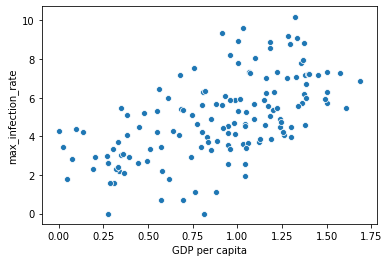

In [31]:
x = data["GDP per capita"]
y= data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

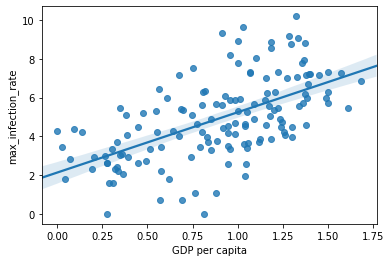

In [32]:
sns.regplot(x,np.log(y))

### Plotting Social support vs maximum Infection rate

In [33]:
a=data["Social support"]
b=data["max_infection_rate"]

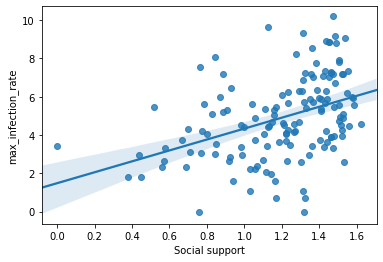

In [34]:
sns.regplot(a,np.log(b))

### Plotting Healthy life expectancy vs maximum Infection rate

In [35]:
c=data["Healthy life expectancy"]
d=data["max_infection_rate"]

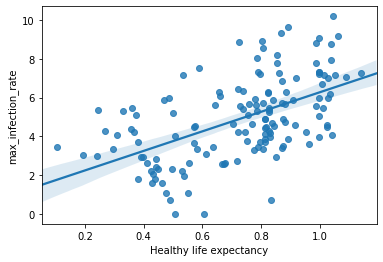

In [36]:
sns.regplot(c,np.log(d))

###  Plotting Freedom to make life choices vs maximum Infection rate

In [37]:
e=data["Freedom to make life choices"]
f=data["max_infection_rate"]

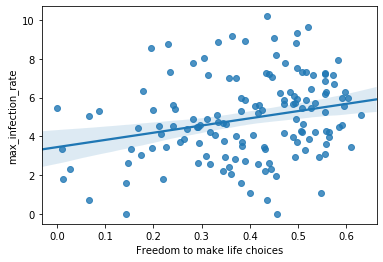

In [38]:
sns.regplot(e,np.log(f))

In [39]:
Corona_Death_csv=pd.read_csv("Datasets/covid19_deaths_dataset.csv")